<a href="https://colab.research.google.com/github/JenioDwiSetyoFavianGian/MACHINE-LEARNING-2023/blob/main/KUIS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Jenio Dwi Setyo Favian Gian

Kelas : TI-3F

NIM   : 2141720212

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST
## Tentang Dataset MNIST
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!


In [25]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# metrics accuracy with multinominal naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

import seaborn as sns

In [26]:
mnist = fetch_openml('mnist_784', version=1, parser="auto", as_frame=False)

In [27]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
# Mendapatkan data gambar dan label
X, y = mnist.data, mnist.target

In [30]:
unique_labels, count = np.unique(y, return_counts=True)

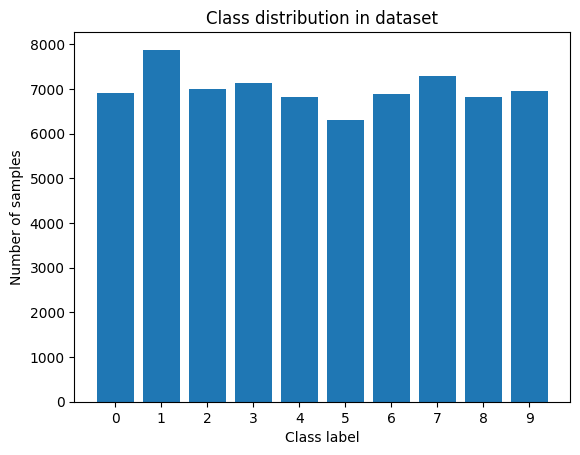

In [31]:
plt.bar(unique_labels, count)
plt.xlabel("Class label")
plt.ylabel("Number of samples")
plt.title("Class distribution in dataset")
plt.show()

In [32]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the training set
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Train KNN classifier on the balanced sample of the training set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.96      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



**Penjelasan :**
Berdasarakan hasil perhitungan dan visualisasi, dapat dilihat bahwa data label dari dataset MNIST terbilang seimbang. Hal ini dapat dilihat dari jumlah dari masing-masing data yang tidak ada perbedaan yang terlalu signifikan.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

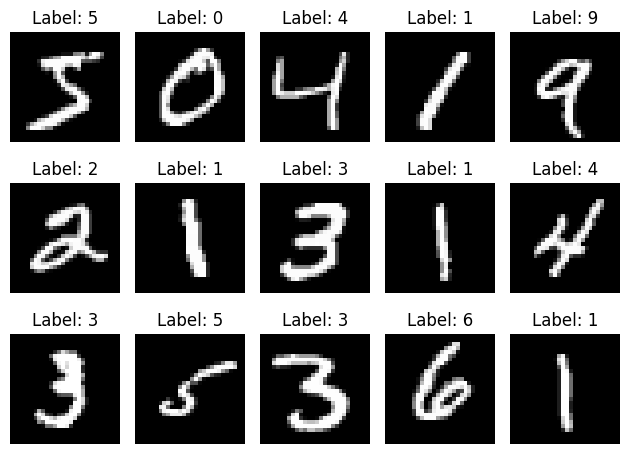

In [33]:
# Menampilkan 15 gambar pertama beserta labelnya
num_images_to_show = 15
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Penjelasan :** Kode program di atas merupakan contoh kode yang digunakan untuk menampilkan sejumlah gambar dengan labelnya sejumlah 15 dalam bentuk grid menggunakan library Matplotlib.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

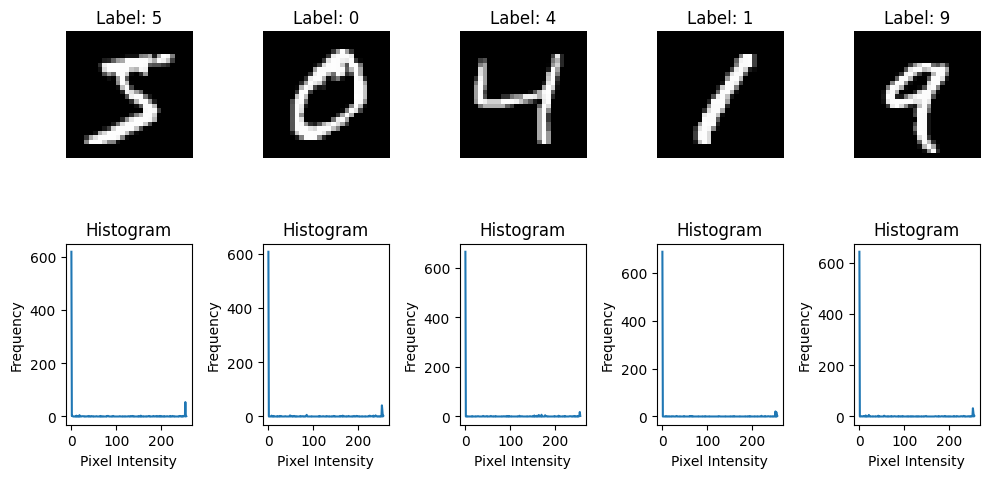

In [34]:
# Pilih 5 citra untuk dihitung histogramnya
num_display = 5

# menghitung histogram untuk 5 citra pertama
histograms = np.array([np.histogram(image.reshape(28, 28),
 bins=256, range=(0, 256))[0] for image in X[:num_display]])

# membuat size canvas
plt.figure(figsize=(10, 7))

for i in range(num_display):
    plt.subplot(3, num_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_display, num_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Penjelasan :** Kode program digunakan untuk menghitung histogram dari lima citra dalam dataset yang tidak terdefinisi (diasumsikan ada dalam variabel X) dan menampilkannya dalam bentuk gambar dan grafik histogram.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [35]:
# Rasio 70:30
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Cek ukuran data
print("Ukuran data training dan testing (70:30):")
print("Data training:", x_train_70.shape, y_train_70.shape)
print("Data testing:", x_test_70.shape, y_test_70.shape)

print("\nUkuran data training dan testing (80:20):")
print("Data training:", x_train_80.shape, y_train_80.shape)
print("Data testing:", x_test_80.shape, y_test_80.shape)

print("\nUkuran data training dan testing (90:10):")
print("Data training:", x_train_90.shape, y_train_90.shape)
print("Data testing:", x_test_90.shape, y_test_90.shape)

Ukuran data training dan testing (70:30):
Data training: (49000, 784) (49000,)
Data testing: (21000, 784) (21000,)

Ukuran data training dan testing (80:20):
Data training: (56000, 784) (56000,)
Data testing: (14000, 784) (14000,)

Ukuran data training dan testing (90:10):
Data training: (63000, 784) (63000,)
Data testing: (7000, 784) (7000,)


5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [36]:
# Import SVM classifier
from sklearn.svm import SVC
# Create SVC object and call fit function to train model
clf = SVC(kernel='linear')
clf.fit(x_test_70, y_test_70)

SVC(kernel='linear')

In [37]:
# Buat objek SVC dan panggil fungsi fit untuk melatih model
clf = SVC(kernel='linear')
clf.fit(x_test_70, y_test_70)

# Tampilkan skor akurasi
accuracy = clf.score(x_test_70, y_test_70)
print("Akurasi Model pada Data Uji:", accuracy)

Akurasi Model pada Data Uji: 1.0


6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [41]:
# Inisialisasi model Multinomial Naive Bayes
mnb = MultinomialNB()

# Latih model pada data pelatihan
mnb.fit(x_train_70, y_train_70)

# Prediksi menggunakan data pelatihan
y_pred_train = mnb.predict(x_train_70)

# Prediksi menggunakan data pengujian
y_pred_test = mnb.predict(x_test_70)

# Evaluasi akurasi data pelatihan
acc_train = accuracy_score(y_train_70, y_pred_train)

# Evaluasi akurasi data pengujian
acc_test = accuracy_score(y_test_70, y_pred_test)

# Print hasil evaluasi
print(f'Akurasi pada data pelatihan: {acc_train}')
print(f'Akurasi pada data pengujian: {acc_test}')

Akurasi pada data pelatihan: 0.8278979591836735
Akurasi pada data pengujian: 0.8257142857142857


In [42]:
report_train = classification_report(y_train_70, y_pred_train)
report_test = classification_report(y_test_70, y_pred_test)

# print hasil evaluasi
print(f'Hasil klrifikasi report data train : \n{report_train}')
print(f'Hasil klrifikasi report data test  : \n{report_test}')

Hasil klrifikasi report data train : 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4845
           1       0.88      0.94      0.91      5513
           2       0.88      0.83      0.85      4857
           3       0.80      0.81      0.81      4965
           4       0.84      0.75      0.79      4888
           5       0.85      0.67      0.75      4398
           6       0.88      0.91      0.89      4788
           7       0.94      0.83      0.88      5045
           8       0.66      0.78      0.72      4833
           9       0.69      0.83      0.75      4868

    accuracy                           0.83     49000
   macro avg       0.83      0.83      0.83     49000
weighted avg       0.84      0.83      0.83     49000

Hasil klrifikasi report data test  : 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
  

Text(0.5, 1.0, 'Confusion Matrix - Data Train')

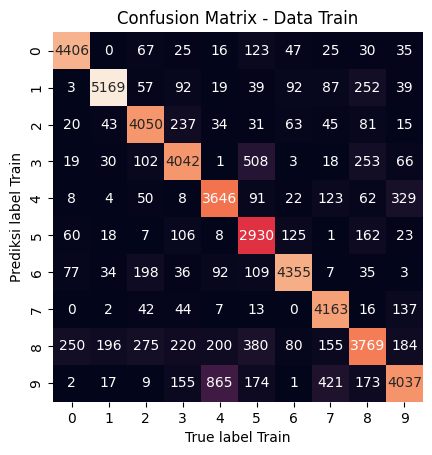

In [46]:
# bentuk confusion matrix train and test
mat_train = confusion_matrix(y_train_70, y_pred_train)
mat_test = confusion_matrix(y_test_70, y_pred_test)

sns.heatmap(mat_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Train')
plt.ylabel('Prediksi label Train')
plt.title('Confusion Matrix - Data Train')


Text(0.5, 1.0, 'Confusion Matrix - Data Test')

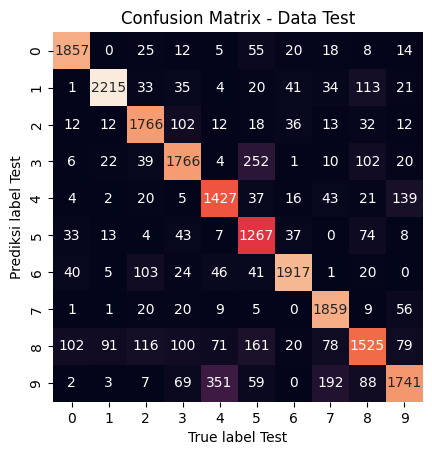

In [47]:
sns.heatmap(mat_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('True label Test')
plt.ylabel('Prediksi label Test')
plt.title('Confusion Matrix - Data Test')

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

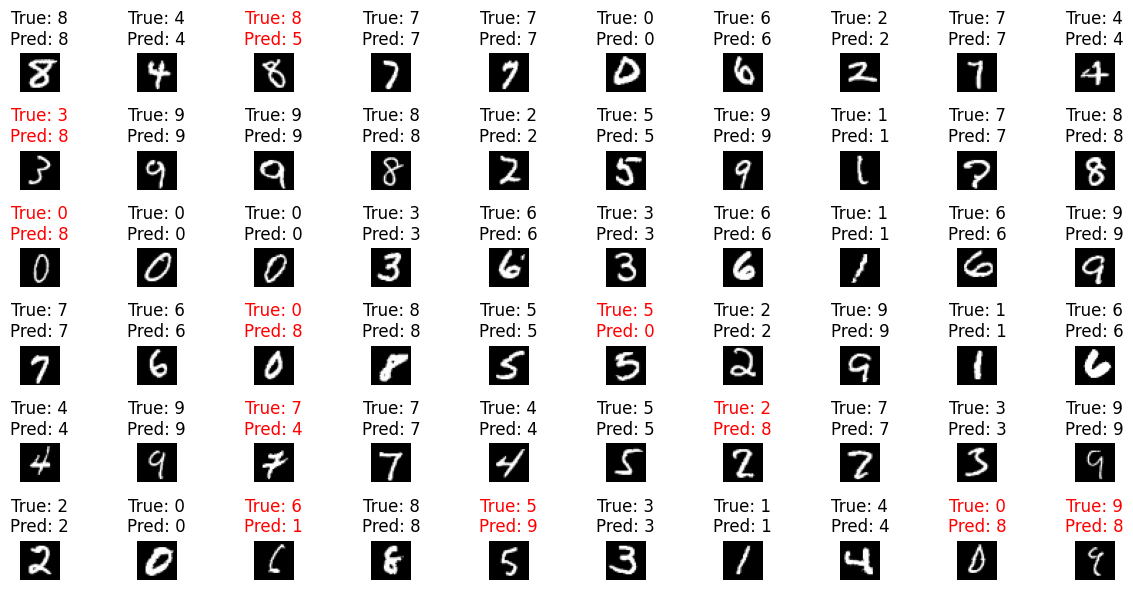

Akurasi Model: 81.67%


In [50]:
import pandas as pd

# jumlah sample yang akan ditampilkan
n_samples = 60

# init jumlah predeksi yang salah
n_wrong = 0
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.subplot(6, 10, i + 1)
    plt.imshow(x_test_70[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_test.iloc[i] if isinstance(y_pred_test, pd.Series) else y_pred_test[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'
        n_wrong += 1

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

print(f'Akurasi Model: {(((n_samples-n_wrong)/n_samples)*100):.2f}%')

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [51]:
from sklearn.metrics import accuracy_score

# Prediksi model SVM
test_preds_svm = clf.predict(X_test)

# Prediksi model Naive Bayes
test_preds_nb = mnb.predict(X_test)

# Hitung akurasi
svm_accuracy = accuracy_score(y_test, test_preds_svm)
nb_accuracy = accuracy_score(y_test, test_preds_nb)

# Print the accuracies
print(f'Akurasi SVM        : {svm_accuracy * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy * 100:.2f}%')

Akurasi SVM        : 100.00%
Akurasi Naive Bayes: 82.89%


Hasil akurasi SVM dan Naive Bayes:

- SVM (Support Vector Machine) memiliki akurasi sempurna (100%) pada data pengujian, menunjukkan performa yang sangat baik.

- Naive Bayes memiliki akurasi yang lebih rendah, sekitar 82.57%, tetapi masih dapat dianggap baik, dengan pendekatan yang lebih sederhana.

Jadi model terbaik adalag SVM dengan tikat akurasi mencapai 100%.